Introduction
============


Setting up `Python`
------------------------------

The data we are going to use as illustrations were recorded by Andreas
Pippow [Kloppenburg Lab, University of Cologne](http://cecad.uni-koeln.de/Prof-Peter-Kloppenburg.82.0.html) and
are freely available in [HDF5](http://www.hdfgroup.org/HDF5/) format at
the following URLs:
-   <http://xtof.disque.math.cnrs.fr/data/CCD_calibration.hdf5> for the
    calibration data.
-   <http://xtof.disque.math.cnrs.fr/data/Data_POMC.hdf5> for the POMC
    data.

`Python 3` is used here so if you want to do the same with `Python 2`
you should start with:

``` {.python}
from __future__ import print_function, division, unicode_literals, absolute_import
```


Loading the data into `Python` requires the installation of
[h5py](http://docs.h5py.org/en/latest/index.html), a module available in
the [anaconda](http://continuum.io/downloads) distribution.

### Loading the POMC data set in `Python`

We start by downloading the data set on our local disk. To do that we
need the `urllib` module:

In [1]:
from urllib.request import urlretrieve
urlretrieve("http://xtof.disque.math.cnrs.fr/data/Data_POMC.hdf5","Data_POMC.hdf5")

('Data_POMC.hdf5', <http.client.HTTPMessage at 0x7fbda1e2edd8>)

`Python 2` users should type instead:

``` {.python}
import urllib
urllib.urlretrieve("http://xtof.disque.math.cnrs.fr/data/Data_POMC.hdf5","Data_POMC.hdf5")
```

Once the data are on the local disk, they are loaded into `Python` with:

In [1]:
import h5py

In [2]:
pomc = h5py.File("Data_POMC.hdf5","r")

Information on the content of this `HDF5` file can be found in its
`README` attribute:

In [4]:
pomc.attrs['README']

'POMC data set recorded by Andreas Pippow (Kloppenburg Laboratory Cologne University, http://cecad.uni-koeln.de/Prof-Peter-Kloppenburg.82.0.html). 168 measurements performed with a CCD camera recording Fura-2 fluorescence (excitation wavelength: 340 nm). The size of the CCD chip is 60 x 80 pixels. A stimulation (depolarization induced calcium entry) comes at time 527. Details about this data set can be found in: Joucla et al (2013) Estimating background-subtracted fluorescence transients in calcium imaging experiments: A quantitative approach. Cell Calcium. 54 (2): 71-85.'

We create next variables pointing to the `time` vector and to the image
`stack`:

In [3]:
time_pomc = pomc['time'][...]
stack_pomc = pomc['stack'][...]

We then close the file:

In [4]:
pomc.close()

### Loading the Calibration data set in `Python`

We start by downloading the data set on our local disk. To do that we
need the `urllib` module:

In [ ]:
urlretrieve("http://xtof.disque.math.cnrs.fr/data/CCD_calibration.hdf5","CCD_calibration.hdf5")

`Python 2` users should type instead:

``` {.python}
urllib.urlretrieve("http://xtof.disque.math.cnrs.fr/data/CCD_calibration.hdf5","CCD_calibration.hdf5")
```

Once the data are on the local disk, they are loaded into `Python` with:

In [5]:
calibration = h5py.File("CCD_calibration.hdf5","r")
list(calibration)

['100ms',
 '10ms',
 '20ms',
 '30ms',
 '40ms',
 '50ms',
 '60ms',
 '70ms',
 '80ms',
 '90ms']

The file is made of 10 `groups` with the above names. Each group
contains 2 `datasets`:

In [8]:
list(calibration['10ms'])

['stack', 'time']

The dataset `stack` contains, as its name says, the image stack and its
shape is:

In [9]:
calibration['10ms/stack'].shape

(60, 80, 100)

So the CCD captor is made of 60 x 80 pixels and the 100 exposures take
the dimension with index 2 (that is the third dimension).

The data set `time` contains a vector of times at which the different
exposure were done:

In [11]:
calibration['10ms/time'].shape

(100,)

All this information can be found in the `README` attribute of the file:

In [12]:
calibration.attrs['README']

'Imago/SensiCam CCD camera (Till Photonics) calibration data set. Fluorescence measurments were made using a fluorescent plastic slide. 10 exposure times from 10 to 100 ms (each making an HDF5 group) were used. For each exposure time 100 exposures were performed (with 200 ms between each). The fluorescence measured in each of the 60 x 80 pixels of the camera are stored in the stack data set of each group. The time data set (a vector) of each group contains the time at which each illumination was done. These recordings were done by Andreas Pippow (Kloppenburg Laboratory Cologne University, http://cecad.uni-koeln.de/Prof-Peter-Kloppenburg.82.0.html). They were used in: Sébastien Joucla, Andreas Pippow, Peter Kloppenburg and Christophe Pouzat (2010) Quantitative estimation of calcium dynamics from ratiometric measurements: A direct, non-ratioing, method. Journal of Neurophysiology 103: 1130-1144.'

### loading key modules

We are going to use the usual scientific python modules plus `SymPy`:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy
plt.ion()
%matplotlib inline

### Some function definitions

In [7]:
def plotSignal(stack,lw=1):
    import numpy as np
    import matplotlib.pyplot as plt
    n_x, n_y, n_t = stack.shape
    amp_min = np.min(stack)
    amp_max = np.max(stack)
    amp_diff = np.ptp(stack)
    x_domain = np.arange(n_t)/n_t
    y_domain = (0,n_y)
    for r_idx in range(n_x):
        for c_idx in range(n_y):
            y_min = n_x - r_idx - 1
            sig = stack[r_idx,c_idx,:]
            Y = (sig-amp_min)/amp_diff + y_min
            X = x_domain + c_idx
            plt.plot(X,Y,lw=lw,color='black')
            plt.ylim([0,n_y-1])
    plt.axis('off')

The variability inherent to fluorescence imaging data
------------------------------------------------------------------

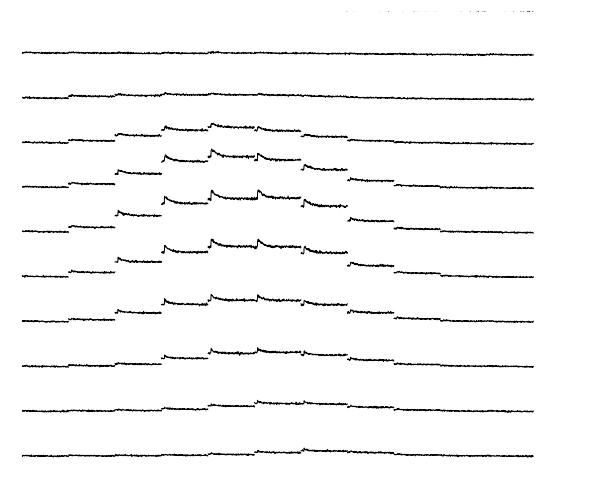

In [8]:
plt.figure(dpi=600,figsize=(10,8))
plotSignal(stack_pomc[20:33,33:44,:],lw=1)

ADU counts (raw data) from Fura-2 excited at 340 nm. Each square
corresponds to a pixel. 25.05 s of data are shown. Same scale on each
sub-plot. Data recorded by Andreas Pippow (Kloppenburg Lab. Cologne
University).

(525, 550)

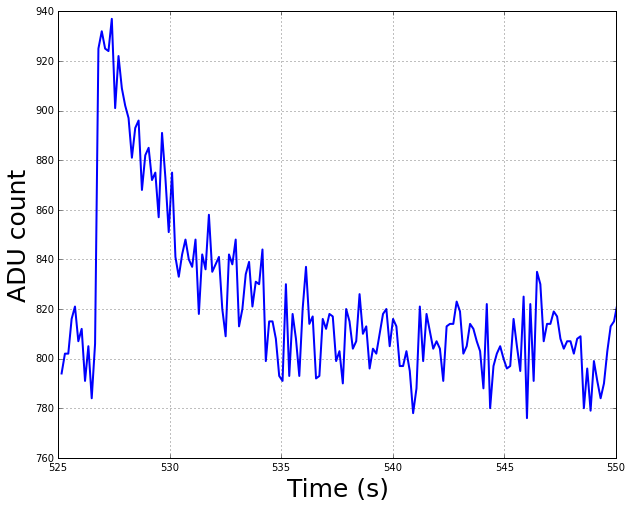

In [9]:
plt.figure(dpi=600,figsize=(10,8))
plt.plot(time_pomc,stack_pomc[27,39,:],lw=2)
plt.xlabel("Time (s)",fontsize=25)
plt.ylabel("ADU count",fontsize=25)
plt.grid()
plt.xlim([525,550])

One of the central pixels of the previous figure.

What do we want? (1)
-----------------------------

Given the data set illustrated on the last two slides we might want to
estimate parameters like:
-   the peak amplitude
-   the decay time constant(s)
-   the baseline level
-   the whole time course (strictly speaking, a function).

If we have a model linking the calcium dynamics---the time course of the
free calcium concentration in the cell---to the fluorescence intensity
like:
$$\frac{\mathrm{d}Ca_t}{\mathrm{dt}} \left(1 + \kappa_{F}(Ca_t) + \kappa_{E}(Ca_t) \right) + \frac{j(Ca_t)}{v} = 0 \, , $$
where $Ca_t$ stands for $[Ca^{2+}]_{free}$ at time t, $v$ is the volume
of the neurite---within which diffusion effects can be neglected---and
$$j(Ca_t) \equiv \gamma (Ca_t - Ca_{steady}) \, ,$$ is the model of
calcium extrusion---$Ca_{steady}$ is the steady state
$[Ca^{2+}]_{free}$---
$$\kappa_{F}(Ca_t) \equiv \frac{F_{total} \, K_{F}}{(K_{F} + Ca_t)^2} \quad \mathrm{and} \quad \kappa_{E}(Ca_t) \equiv \frac{E_{total} \, K_{E}}{(K_{E} + Ca_t)^2} \, ,$$
where $F$ stands for the fluorophore en $E$ for the *endogenous* buffer.

In the previous slide, assuming that the fluorophore (Fura) parameters:
$F_{total}$ and $K_F$ have been calibrated, we might want to estimate:
-   the extrusion parameter: $\gamma$
-   the endogenous buffer parameters: $E_{total}$ and $K_E$

using an equation relating measured fluorescence to calcium:
$$Ca_t = K_{F} \, \frac{S_t - S_{min}}{S_{max} - S_t} \, ,$$ where $S_t$
is the fluorescence (signal) measured at time $t$, $S_{min}$ and
$S_{max}$ are *calibrated* parameters corresponding respectively to the
fluorescence in the absence of calcium and with saturating $[Ca^{2+}]$
(for the fluorophore).

-   The variability of our signal---meaning that under replication of
    our measurements *under the exact same conditions* we wont get the
    exact same signal---implies that our estimated parameters will also
    fluctuate upon replication.
-   Formally our parameters are modeled as *random variables* and **it
    is not enough to summarize a random variable by a single number**.
-   If we cannot get the full distribution function for our parameters,
    we want to give at least ranges within which the true value of the
    parameter should be found with a given probability.
-   In other words: **an analysis without confidence intervals is not an
    analysis**, it is strictly speaking useless since it can't be
    reproduced---if I say that my time constant is 25.76 ms the
    probability that upon replication I get again 25.76 is essentially
    0; if I say that the actual time constant has a 0.95 probability to
    be in the interval [24,26.5], I can make a comparison with
    replications.


A proper handling of the "variability" matters
-----------------------------------------------------------

Let us consider a simple data generation model:
$$Y_i \sim \mathcal{P}(f_i)\, , \quad i=0,1,\ldots,K \; ,$$ where
$\mathcal{P}(f_i)$ stands for the *Poisson distribution* with parameter
$f_i$ :
$$\mathrm{Pr}\{Y_i = n\} = \frac{(f_i)^n}{n!} \exp (-f_i)\, , \quad \mathrm{for} \quad n=0,1,2,\ldots $$
and
$$f_i = f(\delta i| f_{\infty}, \Delta, \beta) = f_{\infty} + \Delta \, \exp (- \beta \, \delta i)\; ,$$
δ is a time step and $f_{\infty}$, Δ and β are model parameters.

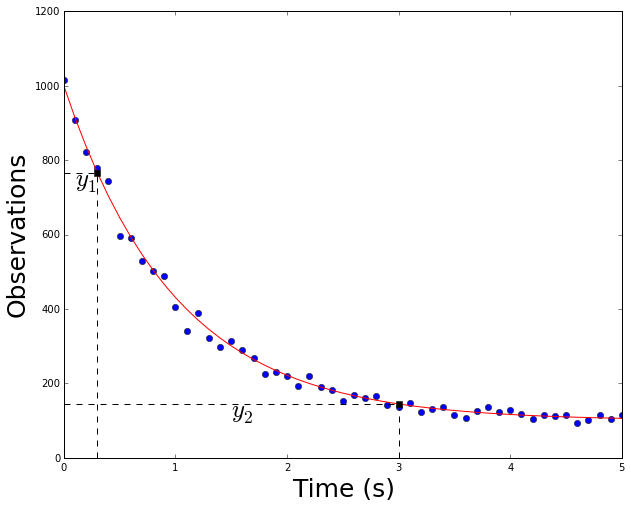

In [10]:
beta_true = 1.0
f_infinite = 100
Delta = 900
X = np.linspace(0,5*beta_true,51)
Theo = Delta*np.exp(-X*beta_true)+f_infinite
np.random.seed(20061001)
Observations = np.random.poisson(Theo)
plt.figure(dpi=600,figsize=(10,8))
plt.plot(X,Observations,'o')
plt.xlabel("Time (s)",fontsize=25)
plt.ylabel("Observations",fontsize=25)
plt.plot(X,Theo,'r')
plt.plot(X[[3,30]],Theo[[3,30]],'sk')
plt.plot([X[3],X[3]],[0,Theo[3]],'--k')
plt.plot([0,X[3]],[Theo[3],Theo[3]],'--k')
plt.plot([X[30],X[30]],[0,Theo[30]],'--k')
plt.plot([0,X[30]],[Theo[30],Theo[30]],'--k')
plt.text(0.1,730,r'$y_1$',fontsize=25)
plt.text(1.5,110,r'$y_2$',fontsize=25)

Data simulated according to the previous model. We are going to assume
that $f_{\infty}$ and $\Delta$ are known and that $(t_1,y_1)$ and
$(t_2,y_2)$ are given. We want to estimate $\beta$.

Two estimators
---------------------------

We are going to consider two
[estimators](https://en.wikipedia.org/wiki/Estimator) for $\beta$:
-   The "classical" least square estimator:
    $$ \tilde{\beta} = \arg \min \tilde{L}(\beta) \; ,$$ where
    $$ \tilde{L}(\beta) = \sum_j \big( y_j - f(t_j \mid \beta) \big)^2 \; .$$
-   The least square estimator applied to the *square root* of the data:
    $$\hat{\beta} = \arg \min \hat{L}(\beta) \; ,$$ where
    $$ \hat{L}(\beta) = \sum_j \big( \sqrt{y_j} - \sqrt{f(t_j \mid \beta)} \big)^2 \; .$$


We perform an empirical study as follows:
-   We simulate 100,000 experiments such that:
    $$ (Y_1,Y_2) \sim \big(\mathcal{P}(f(0.3|\beta_0), \mathcal{P}(f(3|\beta_0)\big) \; ,$$
    with $\beta_0=1$.
-   For each simulated pair, $(y_1,y_2)^{[k]}$ ($k=1,\ldots,10^5$), we
    minimize $\tilde{L}(\beta)$ and $\hat{L}(\beta)$ to obtain:
    $(\tilde{\beta}^{[k]},\hat{\beta}^{[k]})$.
-   We build histograms for $\tilde{\beta}^{[k]}$ and
    $\hat{\beta}^{[k]}$ as density estimators of our estimators.

## Simulations with the two estimators


### Definitions of utility functions required for applying Newton's method to the first estimator

We want to minimize: $$\tilde{\beta} = \arg \min \tilde{L}(\beta) \; ,$$
where
$$\tilde{L}(\beta) = \big( y_1 - f(t_1 \mid \beta) \big)^2 + \big( y_2 - f(t_2 \mid \beta) \big)^2 \; .$$
In other words, we want the root of the derivative. We can get this
derivative by hand or with the `SymPy` module. We will next use the
latter.


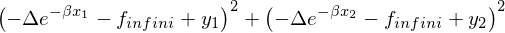

In [18]:
sy.init_printing()
x_1,x_2,y_1,y_2,Delta,beta,f_infini = sy.symbols('x_1,x_2,y_1,y_2,Delta,beta,f_infini',real=True)
L_tilde = (y_1 - Delta*sy.exp(-beta*x_1)-f_infini)**2 + (y_2 - Delta*sy.exp(-beta*x_2)-f_infini)**2
L_tilde

In [19]:
G_tilde = sy.diff(L_tilde,beta)
G_tilde

The following `print` command is usefull to generate the code:

In [20]:
print(G_tilde)

2*Delta*x_1*(-Delta*exp(-beta*x_1) - f_infini + y_1)*exp(-beta*x_1) + 2*Delta*x_2*(-Delta*exp(-beta*x_2) - f_infini + y_2)*exp(-beta*x_2)


In [21]:
G_prime_tilde = sy.diff(G_tilde,beta)
G_prime_tilde

In [22]:
print(G_prime_tilde)

2*Delta**2*x_1**2*exp(-2*beta*x_1) + 2*Delta**2*x_2**2*exp(-2*beta*x_2) - 2*Delta*x_1**2*(-Delta*exp(-beta*x_1) - f_infini + y_1)*exp(-beta*x_1) - 2*Delta*x_2**2*(-Delta*exp(-beta*x_2) - f_infini + y_2)*exp(-beta*x_2)


We define next a "constructor" function returning the functions required
to implement Newton's method:

In [11]:
def mk_g_dg_tilde(x_1,y_1,x_2,y_2,Delta=900,f_infini=100):
    def g(beta):
        return 2*Delta*x_1*(-Delta*np.exp(-beta*x_1) - \
                            f_infini + y_1)*np.exp(-beta*x_1) + \
                            2*Delta*x_2*(-Delta*np.exp(-beta*x_2) - \
                                         f_infini + y_2)*np.exp(-beta*x_2)
    def dg(beta):
        return 2*Delta**2*x_1**2*np.exp(-2*beta*x_1) + \
            2*Delta**2*x_2**2*np.exp(-2*beta*x_2) - \
            2*Delta*x_1**2*(-Delta*np.exp(-beta*x_1) - \
                            f_infini + y_1)*np.exp(-beta*x_1) - \
                            2*Delta*x_2**2*(-Delta*np.exp(-beta*x_2) - \
                                            f_infini + y_2)*np.exp(-beta*x_2)
    return (g,dg)


We then create the required functions:

In [12]:
g_tilde, dg_tilde = mk_g_dg_tilde(X[3],Observations[3],X[30],Observations[30])

We define next a function implementing Newton's method given an initial
guess, a derivative of the target function and a second derivative of
the target:

In [13]:
def newton(initial_guess,
           target_d,
           target_dd,
           tolerance=1e-6,
           iter_max=100):
    pos = initial_guess
    value = target_d(pos)
    idx = 0
    while idx <= iter_max and abs(value) > tolerance :
        pos -= value/target_dd(pos)
        idx += 1
        value = target_d(pos)
    return (pos,value,idx)

A short test:

In [14]:
newton(1.0,g_tilde,dg_tilde)

(0.97769372257738074, -4.8977199185173959e-07, 3)

### Definitions of utility functions required for applying Newton's method to the second estimator

We now want to minimize: $$\hat{\beta} = \arg \min \hat{L}(\beta) \; ,$$
where
$$\hat{L}(\beta) = \big( \sqrt{y_1} - \sqrt{f(t_1 \mid \beta)} \big)^2 + \big( \sqrt{y_2} - \sqrt{f(t_2 \mid \beta)} \big)^2 \; .$$
We use `Sympy` since doing these calculations by hand is rather "heavy":

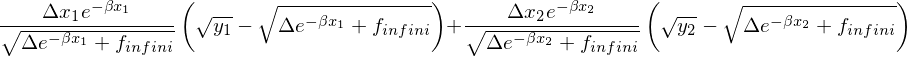

In [27]:
L_hat = (sy.sqrt(y_1) - sy.sqrt(Delta*sy.exp(-beta*x_1) + f_infini))**2 + (sy.sqrt(y_2) - sy.sqrt(Delta*sy.exp(-beta*x_2) + f_infini))**2
G_hat = sy.diff(L_hat,beta)
G_hat

In [30]:
print(G_hat)

Delta*x_1*(sqrt(y_1) - sqrt(Delta*exp(-beta*x_1) + f_infini))*exp(-beta*x_1)/sqrt(Delta*exp(-beta*x_1) + f_infini) + Delta*x_2*(sqrt(y_2) - sqrt(Delta*exp(-beta*x_2) + f_infini))*exp(-beta*x_2)/sqrt(Delta*exp(-beta*x_2) + f_infini)


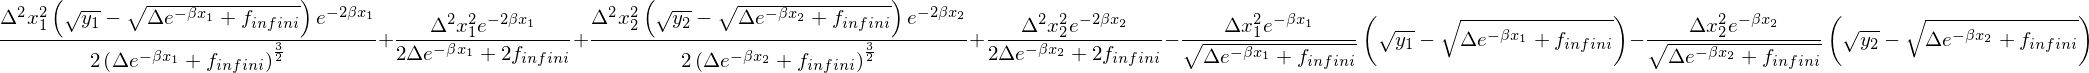

In [28]:
G_prime_hat = sy.diff(G_hat,beta)
G_prime_hat

In [29]:
print(G_prime_hat)

Delta**2*x_1**2*(sqrt(y_1) - sqrt(Delta*exp(-beta*x_1) + f_infini))*exp(-2*beta*x_1)/(2*(Delta*exp(-beta*x_1) + f_infini)**(3/2)) + Delta**2*x_1**2*exp(-2*beta*x_1)/(2*(Delta*exp(-beta*x_1) + f_infini)) + Delta**2*x_2**2*(sqrt(y_2) - sqrt(Delta*exp(-beta*x_2) + f_infini))*exp(-2*beta*x_2)/(2*(Delta*exp(-beta*x_2) + f_infini)**(3/2)) + Delta**2*x_2**2*exp(-2*beta*x_2)/(2*(Delta*exp(-beta*x_2) + f_infini)) - Delta*x_1**2*(sqrt(y_1) - sqrt(Delta*exp(-beta*x_1) + f_infini))*exp(-beta*x_1)/sqrt(Delta*exp(-beta*x_1) + f_infini) - Delta*x_2**2*(sqrt(y_2) - sqrt(Delta*exp(-beta*x_2) + f_infini))*exp(-beta*x_2)/sqrt(Delta*exp(-beta*x_2) + f_infini)


We define next the corresponding constructor function:

In [15]:
def mk_g_dg_hat(x_1,y_1,x_2,y_2,Delta=900,f_infini=100):
    def g(beta):
        return Delta*x_1*(np.sqrt(y_1) - np.sqrt(Delta*np.exp(-beta*x_1) + f_infini))*np.exp(-beta*x_1)/np.sqrt(Delta*np.exp(-beta*x_1) + f_infini) + Delta*x_2*(np.sqrt(y_2) - np.sqrt(Delta*np.exp(-beta*x_2)+ f_infini))*np.exp(-beta*x_2)/np.sqrt(Delta*np.exp(-beta*x_2) +f_infini)
    def dg(beta):
        return Delta**2*x_1**2*(np.sqrt(y_1) - np.sqrt(Delta*np.exp(-beta*x_1) + f_infini))*np.exp(-2*beta*x_1)/(2*(Delta*np.exp(-beta*x_1) + f_infini)**(3/2)) + Delta**2*x_1**2*np.exp(-2*beta*x_1)/(2*(Delta*np.exp(-beta*x_1) + f_infini)) + Delta**2*x_2**2*(np.sqrt(y_2) - np.sqrt(Delta*np.exp(-beta*x_2) + f_infini))*np.exp(-2*beta*x_2)/(2*(Delta*np.exp(-beta*x_2) + f_infini)**(3/2)) + Delta**2*x_2**2*np.exp(-2*beta*x_2)/(2*(Delta*np.exp(-beta*x_2) + f_infini)) - Delta*x_1**2*(np.sqrt(y_1) - np.sqrt(Delta*np.exp(-beta*x_1) + f_infini))*np.exp(-beta*x_1)/np.sqrt(Delta*np.exp(-beta*x_1) + f_infini) - Delta*x_2**2*(np.sqrt(y_2) - np.sqrt(Delta*np.exp(-beta*x_2) + f_infini))*np.exp(-beta*x_2)/np.sqrt(Delta*np.exp(-beta*x_2) + f_infini)
    return (g,dg)

A little test:

In [16]:
g_hat, dg_hat = mk_g_dg_hat(X[3],Observations[3],X[30],Observations[30])    
newton(1.0,g_hat,dg_hat)

(1.0226210475375788, -4.1330077138468369e-09, 3)

### The simulation

In [17]:
n_rep = int(1e5)
beta_tilde = np.zeros((n_rep,3))
beta_hat = np.zeros((n_rep,3))
np.random.seed(20110928)
for rep_idx in range(n_rep):
    Y = np.random.poisson(Theo[[3,30]])
    g_tilde, dg_tilde = mk_g_dg_tilde(X[3],Y[0],X[30],Y[1])
    beta_tilde[rep_idx,:] = newton(1.0,g_tilde,dg_tilde)
    g_hat, dg_hat = mk_g_dg_hat(X[3],Y[0],X[30],Y[1])    
    beta_hat[rep_idx,:] = newton(1.0,g_hat,dg_hat)

We check that every simulation ended before the maximal allowed number
of iteration:

In [18]:
(any(beta_tilde[:,2] == 100),any(beta_hat[:,2] == 100))

(False, False)

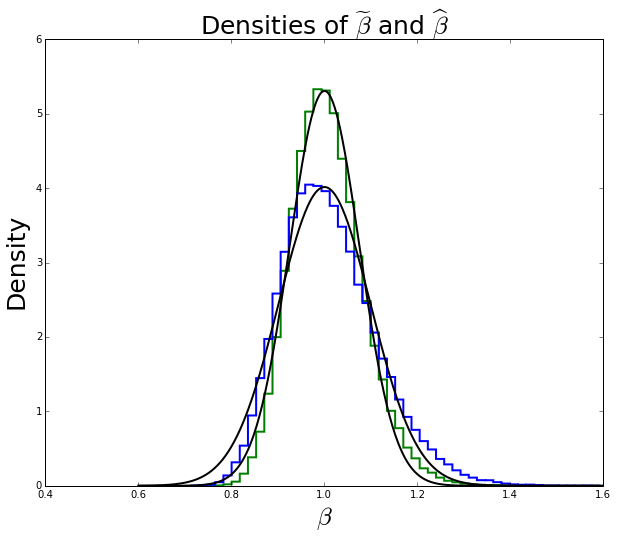

In [19]:
def Ffct(beta): 
    return 900 * np.exp(-X[[3,30]]*beta) + 100

def dFfct(beta):
    return -X[[3,30]]*900 * np.exp(-X[[3,30]]*beta)

sd0 = np.sqrt((np.sum(dFfct(1.0)**2*Ffct(1.0))/np.sum(dFfct(1.0)**2)**2))
sd1 = np.sqrt(1.0/np.sum(dFfct(1.0)**2/Ffct(1.0)))
beta_vector = np.linspace(0.6,1.6,501)
plt.figure(dpi=600,figsize=(10,8))
useless_stuff = plt.hist([beta_tilde[:,0],beta_hat[:,0]],bins=50,normed=True,histtype='step',lw=2)
plt.xlabel(r'$\beta$',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.title(r'Densities of $\widetilde{\beta}$ and $\widehat{\beta}$',fontsize=25)
plt.plot(beta_vector,np.exp(-0.5*(beta_vector-1)**2/sd0**2)/sd0/np.sqrt(2*np.pi),color='black',lw=2)
plt.plot(beta_vector,np.exp(-0.5*(beta_vector-1)**2/sd1**2)/sd1/np.sqrt(2*np.pi),color='black',lw=2)

Both histograms are built with 50 bins. $\hat{\beta}$ (green) is __clearly__
better than $\tilde{\beta}$ (blue) since its variance is smaller. The
derivation of the theoretical (large sample) densities is given in
[Joucla et al (2010)](http://intl-jn.physiology.org/cgi/content/short/103/2/1130).

CCD camera noise
==========

CCD basics
--------------

![](zerosept_vanVliet1998F3.png)

Source: L. van Vliet et col. (1998) [Digital Fluorescence Imaging Using Cooled CCD Array Cameras](http://homepage.tudelft.nl/e3q6n/publications/1998/AP98LVDSTY/AP98LVDSTY.html) (figure 3).


"Noise" sources in CCD
-----------------------------------

-   The "Photon noise" or "shot noise" arises from the fact the
    measuring a fluorescence intensity, λ, implies **counting
    photons**---unless one changes the laws of Physics there is nothing
    one can do to eliminate this source of variability (improperly
    called "noise")---:
    $$\mathrm{Pr}\{N=n\} = \frac{\lambda^n}{n!} \exp -\lambda\, , \quad n \, = \, 0,1,\ldots\, , \quad \lambda > 0\; .$$
-   The "thermal noise" arises from thermal agitation which "dumps"
    electrons in potential wells; this "noise" also follows a Poisson
    distribution but it can be made negligible by *cooling down* the
    camera.
-   The "read out noise" arises from the conversion of the number of
    photo-electrons into an equivalent tension; it follows a normal
    distribution whose variance is independent of the mean (as long as
    reading is not done at too high a frequency).
-   The "digitization noise" arises from the mapping of a continuous
    value, the tension, onto a grid; it is negligible as soon as more
    than 8 bit are used.

A simple CCD model
-------------------------------

-   We can easily obtain a simple CCD model taking into account the two
    main "noise" sources (photon and read-out).
-   To get this model we are going the fact (a theorem) that when a
    **large number of photon are detected**, the Poisson distribution is
    well approximated by ([converges in
    distribution](http://en.wikipedia.org/wiki/Convergence_in_distribution#Convergence_in_distribution)
    to) a normal distribution with identical mean and variance:
    $$\mathrm{Pr}\{N=n\} = \frac{\lambda^n}{n!} \exp -\lambda \approx \mathcal{N}(\lambda,\lambda) \; .$$
-   In other words:
    $$ N \approx \lambda + \sqrt{\lambda} \, \epsilon \; ,$$ where
    $\epsilon \sim \mathcal{N}(0,1)$ (follows a standard normal
    distribution).
-   A read-out noise is added next following a normal distribution with
    0 mean and variance $\sigma_{R}^2$.
-   We are therefore adding to the random variable $N$ a new
    **independent** random variable $R \sim \mathcal{N}(0,\sigma_{R}^2)$
    giving:
    $$M \equiv N+R \approx \lambda + \sqrt{\lambda+\sigma_{R}^2} \, \epsilon \; ,$$
    where the fact that the sum of two independent normal random
    variables is a normal random variable whose mean is the sum of the
    mean and whose variance is the sum of the variances has been used.
-   Since the capacity of the photo-electron weels is finite (35000 for
    the camera used in the first slides) and since the number of
    photon-electrons will be digitized on 12 bit (4096 levels), a "gain"
    $G$ **smaller than one** must be applied if we want to represent
    faithfully (without saturation) an almost full well.
-   We therefore get:
    $$Y \equiv G \cdot M \approx G \, \lambda + \sqrt{G^2 \, (\lambda+\sigma_{R}^2)} \, \epsilon \; .$$

For completeness: Convergence in distribution of a Poisson toward a normal rv
-------------------------------------------------------------------------------------------------------

We use the [moment-generating function](http://en.wikipedia.org/wiki/Moment-generating_function) and
the following theorem (_e.g._ John Rice, 2007, _Mathematical Statistics
and Data Analysis_, Chap. 5, Theorem A):
-   If the moment-generating function of each element of the rv sequence
    $X_n$ is $m_n(t)$,
-   if the moment-generating function of the rv $X$ is $m(t)$,
-   if $m_n(t) \rightarrow m(t)$ when $n \rightarrow \infty$ for all
    $|t| \le b$ where $b > 0$
-   then $X_n \xrightarrow{D} X$.

Lets show that: $$Y_n = \frac{X_n - n}{\sqrt{n}} \; , $$ where $X_n$
follows a Poisson distribution with parameter $n$, converges in
distribution towards $Z$ standard normal rv.

We have: $$m_n(t) \equiv \mathrm{E}\left[\exp(Y_n t)\right] \; ,$$
therefore:
$$m_n(t) = \sum_{k=0}^{\infty} \exp\left(\frac{k-n}{\sqrt{n}}t\right) \frac{n^k}{k!} \exp(-n) \; ,$$


$$m_n(t) = \exp(-n) \exp(-\sqrt{n}t) \sum_{k=0}^{\infty} \frac{\left(n \exp\left(t/\sqrt{n}\right)\right)^k}{k!}$$
$$m_n(t) = \exp\left(-n - \sqrt{n} t+ n \exp(t/\sqrt{n})\right)$$
$$m_n(t) = \exp\left(-n - \sqrt{n} t+ n \sum_{k=0}^{\infty}  \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!}\right)$$
$$m_n(t) = \exp\left(-n - \sqrt{n} t+ n + \sqrt{n} t + \frac{t^2}{2} + n \sum_{k=3}^{\infty}  \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!}\right)$$
$$m_n(t) = \exp\left( \frac{t^2}{2} + n \sum_{k=3}^{\infty} \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!}\right)$$


We must show:
$$n \sum_{k=3}^{\infty}\left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!} \rightarrow_{n \rightarrow \infty} 0 \quad \forall\ |t| \le b, \quad \text{where}
      \quad b > 0\, ,$$ since $\exp(-t^2/2)$ is the moment-generating
function of a standard normal rv. But
$$\left| n \sum_{k=3}^{\infty} \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!} \right| \rightarrow_{n \rightarrow \infty} 0 \quad \forall\ |t| \le b, \quad \text{where} \quad b > 0\,$$
implies that since $$- \left|n \sum_{k=3}^{\infty}
      \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!} \right| \le n
    \sum_{k=3}^{\infty} 
      \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!} \le \left| n
        \sum_{k=3}^{\infty} 
      \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!} \right| \, .$$

But for all $|t| \le b$ where $b > 0$

\begin{displaymath}
  \begin{array}{lcl}
    0 \le \left| n \sum_{k=3}^{\infty}
      \left(\frac{t}{\sqrt{n}}\right)^k \frac{1}{k!} \right| & \le & n
    \sum_{k=3}^{\infty} 
      \left(\frac{|t|}{\sqrt{n}}\right)^k \frac{1}{k!} \\
      & \le & \frac{|t|^3}{\sqrt{n}} \sum_{k=0}^{\infty} 
      \left(\frac{|t|}{\sqrt{n}}\right)^k \frac{1}{(k+3)!} \\
      & \le & \frac{|t|^3}{\sqrt{n}} \sum_{k=0}^{\infty} 
      \left(\frac{|t|}{\sqrt{n}}\right)^k \frac{1}{k!} \\
      & \le & \frac{|t|^3}{\sqrt{n}}
      \exp\left(\frac{|t|}{\sqrt{n}}\right) \rightarrow_{n \rightarrow
      \infty} 0 \, ,
  \end{array}
\end{displaymath}

which completes the proof.


### Illustrations

We define first a utility function:

In [20]:
from scipy.stats import norm, poisson
ZZ = np.linspace(-3,3,501)
FZ = norm.cdf(ZZ)

def poisson_steps(par,start,end):
    xpairs = [[(i-par)/np.sqrt(par),(i+1-par)/np.sqrt(par)] for i in range(start,end+1)]
    ypairs = [[poisson.cdf(i,par),poisson.cdf(i,par)] for i in range(start,end+1)]
    xlist = []
    ylist = []
    for xends,yends in zip(xpairs,ypairs):
        xlist.extend(xends)
        xlist.append(None)
        ylist.extend(yends)
        ylist.append(None)
    return [xlist,ylist]


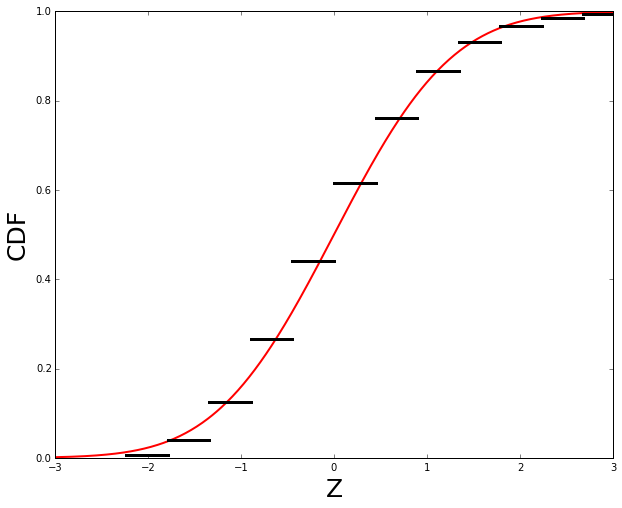

In [21]:
FY = poisson_steps(5,0,25)
plt.figure(dpi=600,figsize=(10,8))
plt.plot(ZZ,FZ,color='red',lw=2)
plt.xlabel('Z',fontsize=25)
plt.ylabel('CDF',fontsize=25)
plt.xlim([-3,3])
plt.plot(FY[0],FY[1],color='black',lw=3)

Cumulative distribution functions (CDF) of $Y_5$ (black) and $Z$ a
standard normal (red).

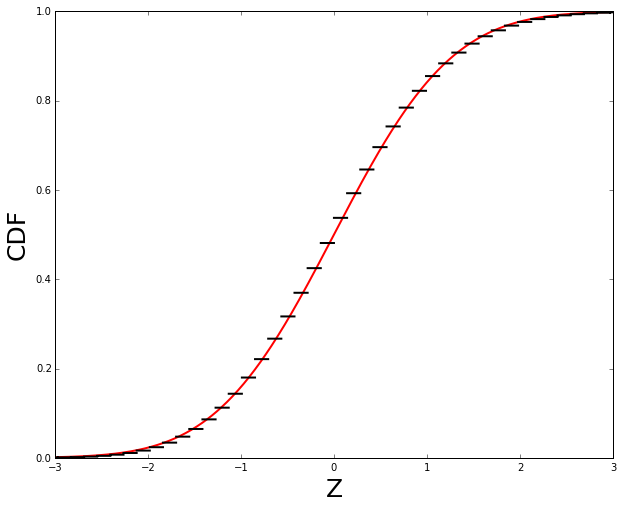

In [22]:
FY = poisson_steps(50,0,500)
plt.figure(dpi=600,figsize=(10,8))
plt.plot(ZZ,FZ,color='red',lw=2)
plt.xlabel('Z',fontsize=25)
plt.ylabel('CDF',fontsize=25)
plt.xlim([-3,3])
plt.plot(FY[0],FY[1],color='black',lw=2)

Cumulative distribution functions (CDF) of $Y_{50}$ (black) and $Z$ a
standard normal (red).

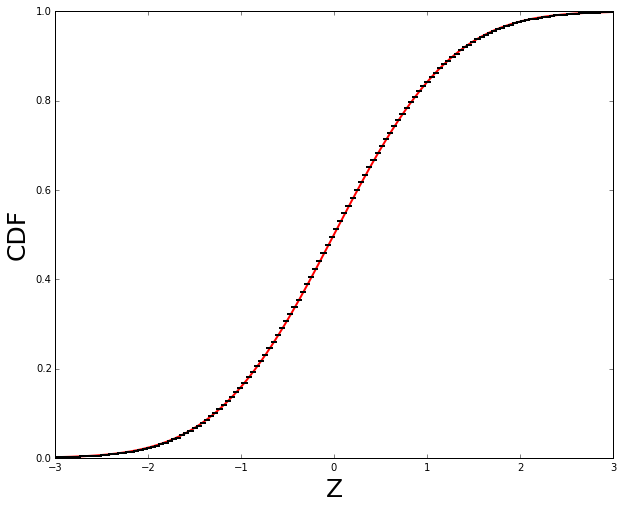

In [23]:
FY = poisson_steps(500,500-67,500+67)
plt.figure(dpi=600,figsize=(10,8))
plt.plot(ZZ,FZ,color='red',lw=2)
plt.xlabel('Z',fontsize=25)
plt.ylabel('CDF',fontsize=25)
plt.xlim([-3,3])
plt.plot(FY[0],FY[1],color='black',lw=2)

Cumulative distribution functions (CDF) of $Y_{500}$ (black) and $Z$ a standard normal (red).

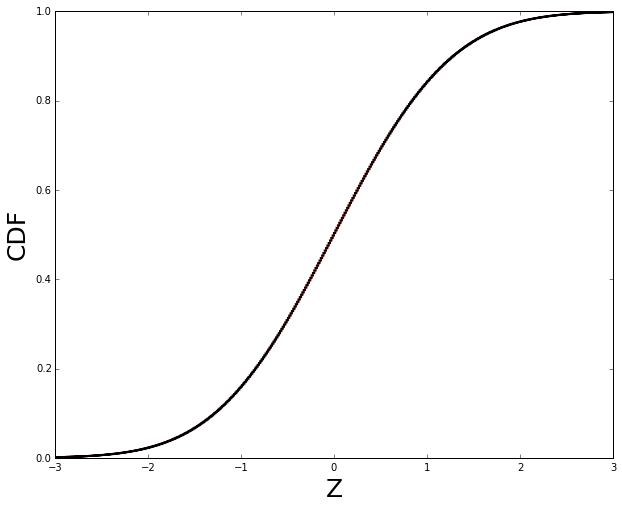

In [24]:
FY = poisson_steps(5000,5000-213,5000+213)
plt.figure(dpi=600,figsize=(10,8))
plt.plot(ZZ,FZ,color='red',lw=2)
plt.xlabel('Z',fontsize=25)
plt.ylabel('CDF',fontsize=25)
plt.xlim([-3,3])
plt.plot(FY[0],FY[1],color='black',lw=2)

Cumulative distribution functions (CDF) of $Y_{5000}$ (black) and $Z$ a standard normal (red).

CCD calibration 
=========

If what I just exposed is correct, with the two (main) "noise" sources,
the observations $Y$ (from a CCD pixel) follow:
$$Y \sim G \, \lambda + \sqrt{G^2 \, (\lambda+\sigma_{R}^2)} \, \epsilon \; ,$$
where $G$ is the camera gain, $\sigma_{R}^2$ is the read-out variance
and $\epsilon$ is a standard normal rv. The values of $G$ and
$\sigma_{R}^2$ are specified by the manufacturer for each camera, but
experience shows that manufacturers tend to be overoptimistic when it
comes to their product performances---they can for instance give an
underestimated $\sigma_{R}^2$. **Its therefore a good idea to measure
these parameters with calibration experiments**. **Such calibration
experiments are also the occasion to check that our simple model is
relevant**.

-   Our problem becomes: How to test
    $Y \sim G \, \lambda + \sqrt{G^2 \, (\lambda+\sigma_{R}^2)} \, \epsilon$
    ? Or how to set different values for $\lambda$?
-   Let's consider a pixel of our CCD "looking" at a fixed volume of a
    [fluorescein](http://en.wikipedia.org/wiki/Fluorescein) solution
    with a given (and stable) concentration. We have two ways of
    modifying λ:
    -   Change the intensity $i_{e}$ of the light source exciting the
        fluorophore.
    -   Change the exposure time $\tau$.


We can indeed write our $\lambda$ as:
$$\lambda = \phi v c i_{e} \tau \, ,$$ where
-   $v$ is the solution's volume "seen" by a given pixel,
-   $c$ is the fluorophore's concentration,
-   $\phi$ is the [quantum yield](http://en.wikipedia.org/wiki/Quantum_yield).

In practice it is easier to vary the exposure time *τ*and that's what
was done in the experiments described next... **Question: Can you guess
what these experiments are?**


Sebastien Joucla and myself asked our collaborators from the
[Kloppenburg lab](http://cecad.uni-koeln.de/Prof-Peter-Kloppenburg.82.0.html)
(Cologne University) to:
-   choose 10 exposure times,
-   for each of the 10 times, perform 100 exposures,
-   for each of the 10 x 100 exposures, record the value $y_{ij}$ of the
    rv $Y_{ij}$ of CCD's pixel $i,j$.

We introduce a rv $Y_{ij}$ for each pixel because it is very difficult
(impossible) to have a uniform intensity ($i_e$) and a uniform volume
($v$) and a uniform quantum yield ($\phi$). We have therefore for each
pixel:
$$Y_{i,j} \sim G \, p_{i,j} \tau + \sqrt{G^2 \, (p_{i,j} \tau+\sigma_{R}^2)} \, \epsilon_{i,j}\; ,$$
where $p_{i,j} = c \phi_{i,j} v_{i,j} i_{e,i,j}$.

-   If our model is correct we should have for each pixel $i,j$, for a
    given exposure time, a mean value:
    $$\bar{y}_{i,j} = \frac{1}{100} \sum_{k=1}^{100} y_{i,j,k} \approx G \, p_{i,j} \tau $$
-   and a variance:
    $$S_{i,j}^2 = \frac{1}{99} \sum_{k=1}^{100} (y_{i,j,k}-\bar{y}_{i,j})^2 \approx G^2 \, (p_{i,j} \tau+\sigma_{R}^2) \; .$$
-   The graph of $S_{i,j}^2$ *vs* $\bar{y}_{i,j}$ should be a straight
    line with slope $G$ ordinate at 0, $G^2 \sigma_{R}^2$.

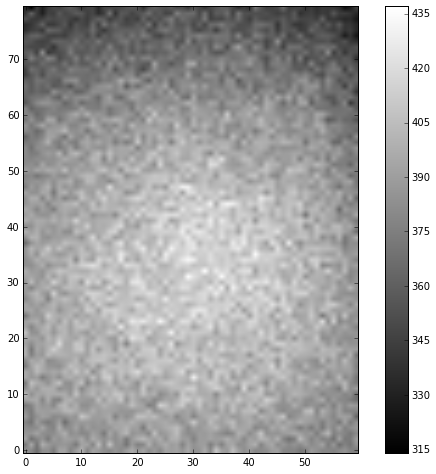

In [25]:
plt.figure(dpi=600,figsize=(10,8))
plt.imshow(np.transpose(calibration['10ms/stack'][:,:,0]),origin='lower')
plt.set_cmap('gray')
plt.colorbar()

The first exposure of 10 ms (experiment performed by Andreas Pippow, Kloppenburg lag, Cologne University).

CCD calibration: Checking the assumptions
------------------------------------------------------

-   The data are going to be analyzed as if the $Y_{i,j,k}$ were IID,
    **but they were sequentially recorded**. It is therefore **strongly
    recommended** to check that the IID hypothesis is reasonable.
-   The small example of the next figure shows that there are no
    (obvious) trends.
-   We must also check the correlation function.


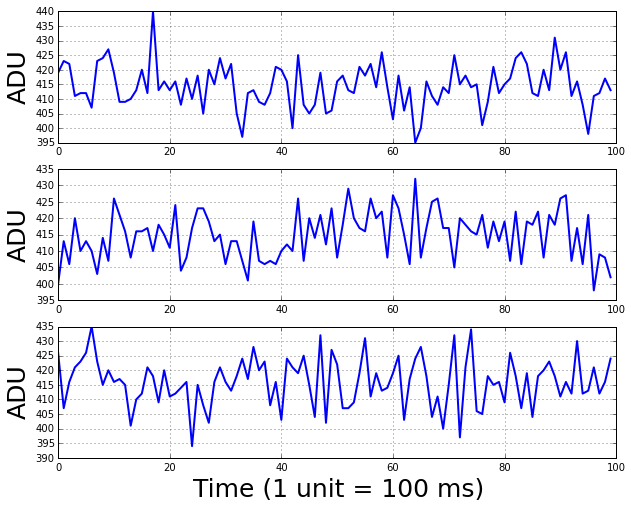

In [27]:
plt.figure(dpi=600,figsize=(10,8))
plt.subplot(311)
plt.plot(calibration['10ms/stack'][31,41,:],lw=2)
plt.ylabel("ADU",fontsize=25)
plt.grid()
plt.subplot(312)
plt.plot(calibration['10ms/stack'][31,40,:],lw=2)
plt.ylabel("ADU",fontsize=25)
plt.grid()
plt.subplot(313)
plt.plot(calibration['10ms/stack'][31,39,:],lw=2)
plt.xlabel("Time (1 unit = 100 ms)",fontsize=25)
plt.ylabel("ADU",fontsize=25)
plt.grid()

Counts time evolution for three neighboring pixels (10 ms exposure time).

-   If the $Y_{i,j,k}$ are not IID we expect a more or less linear
    trend---due to bleaching of the dye.
-   Rather then looking at each individual pixel sequence like on the
    previous slide, we can fit the following linear model model to each
    pixel: $$Y_{i,j,k} = \beta_0 + \beta_1 k + \sigma \epsilon_{i,j}$$
    where the $\epsilon_{i,j} \stackrel{IID}{\sim} \mathcal{N}(0,1)$,
    and check if $\beta_1$ can be reasonably considered as null; while a
    trend due to bleaching would give a negative $\beta_1$.
-   Without a trend, the theoretical distribution of
    $\hat{\beta}_1/\hat{\sigma}_{\beta_1}$---$\hat{\beta}_1$ is the
    estimate of $\beta_1$ and $\hat{\sigma}_{\beta_1}$ its estimated
    standard error---is a Student's t distribution with 98 degrees of
    freedom.
-   Applying this idea to the central pixel of the previous slide we
    get...


In [28]:
D_matrix = np.transpose(np.array([np.ones(100),np.arange(100)]))
P_matrix = np.linalg.solve(np.dot(np.transpose(D_matrix),D_matrix),np.transpose(D_matrix))
Y = calibration['10ms/stack'][31,40,:]
beta = np.dot(P_matrix,Y)
beta[1]

0.032043204320430452

In [29]:
Y_hat = np.dot(D_matrix,beta)
s2_hat = np.sum((Y-Y_hat)**2)/98
beta_se = np.sqrt(s2_hat*np.linalg.inv(np.dot(np.transpose(D_matrix),D_matrix)))
beta_se[1,1]

/home/xtof/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


0.025163437413154185

In [30]:
from scipy.stats import t
(beta[1]-beta_se[1,1]*t.ppf(0.975,98),beta[1]+beta_se[1,1]*t.ppf(0.975,98))

(-0.017892818267477018, 0.081979226908337921)

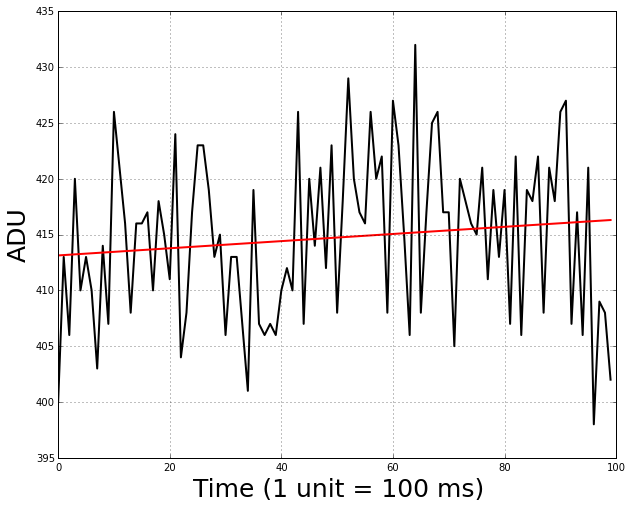

In [31]:
plt.figure(dpi=600,figsize=(10,8))
plt.plot(D_matrix[:,1],Y,lw=2,color='black')
plt.grid()
plt.xlabel("Time (1 unit = 100 ms)",fontsize=25)
plt.ylabel("ADU",fontsize=25)
plt.plot(D_matrix[:,1],Y_hat,lw=2,color='red')

We get $\hat{\beta}_1 = 0.032$ and a 95 % conf. int. for it is: $[-0.018,0.082]$.

We can use the fact that, under the null hypothesis (no trend):
$$\hat{\beta}_1/\hat{\sigma}_{\beta_1} \sim t_{98}$$ by constructing the
empirical cumulative distribution function (ECDF) of the 60 x 80 pixels
at each exposure time to get the maximal difference (in absolute value)
with the theoretical CDF to apply a Kolmogorov test. The critical value
of the latter for a 99% level and a sample size of 100 is **0.163**. We
get the following values:

In [32]:
def linear_fit_stack(stack):
    I,J,K = stack.shape
    D_matrix = np.transpose(np.array([np.ones(K),np.arange(K)]))
    P_matrix = np.linalg.solve(np.dot(np.transpose(D_matrix),D_matrix),np.transpose(D_matrix))
    the_inv = np.linalg.inv(np.dot(np.transpose(D_matrix),D_matrix))[1,1]
    res = np.zeros((I,J))
    for i in range(I):
        for j in range(J):
            beta = np.dot(P_matrix,stack[i,j,:])
            Y_hat = np.dot(D_matrix,beta)
            s2_hat = np.sum((stack[i,j,:]-Y_hat)**2)/(K-2)
            res[i,j] = beta[1]/np.sqrt(s2_hat*the_inv)
    return res

b1stats = [linear_fit_stack(calibration[n+'/stack']) for n in list(calibration)]

In [33]:
[[n for n in list(calibration)], [int(1000*np.max(np.abs(np.arange(1,len(b1s)+1)/len(b1s)-t.cdf(b1s,98))))/1000 for b1s in [np.sort(b1.flatten()) for b1 in b1stats]]]

[['100ms',
  '10ms',
  '20ms',
  '30ms',
  '40ms',
  '50ms',
  '60ms',
  '70ms',
  '80ms',
  '90ms'],
 [0.09, 0.089, 0.116, 0.058, 0.135, 0.209, 0.041, 0.178, 0.153, 0.07]]

The values at 50 and 70 ms are too large.

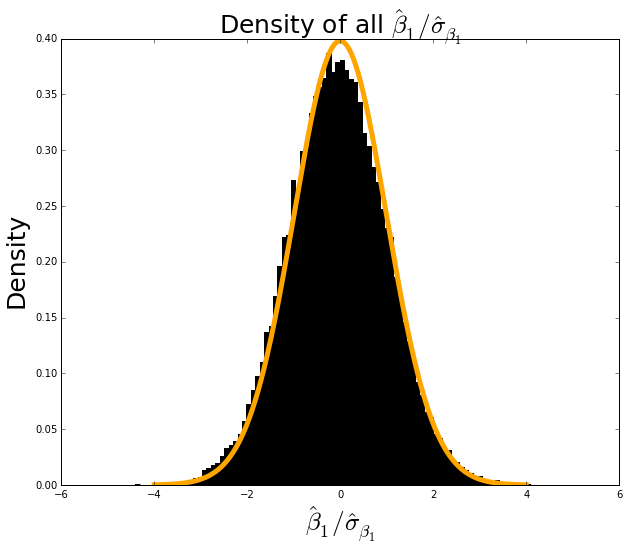

In [34]:
tt = np.linspace(-4,4,501)
plt.figure(dpi=600,figsize=(10,8))
junk = plt.hist(np.concatenate([b1.flatten() for b1 in b1stats]),bins=100,normed=True,color='black')
plt.xlabel(r'$\hat{\beta}_1/\hat{\sigma}_{\beta_1}$',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.title(r'Density of all $\hat{\beta}_1/\hat{\sigma}_{\beta_1}$',fontsize=25)
plt.plot(tt,t.pdf(tt,98),color='orange',lw=5)

Empirical density in black, theoretical one (t with 98 df) in orange.

-   We now look for potential correlations between recording from
    different pixels.
-   We do that by computing the empirical correlation between pixels
    $(i,j)$ and $(u,v)$.
-   We get the empirical mean at each pixel (for a given exposure time)
    that is: $\overline{Y}_{ij} = (1/K) \sum_{k=1}^K Y_{ijk}$.
-   We get the empirical variance:
    $S^2_{ij} =  1/(K-1) \sum_{k=1}^K (Y_{ijk}-\overline{Y}_{ij})^2$.
-   We then obtain the normalized signal or *standard score*:
    $N_{ijk} = (Y_{ijk}-\overline{Y}_{ij})/\sqrt{S^2_{ij}}$.
-   The correlation coefficient is then:
    $\rho(ij,uv) = 1/(K-1) \sum_{k=1}^K N_{ijk} N_{uvk}$.
-   Under the null hypothesis, no correlation,
    $\rho(ij,uv) \sim \mathcal{N}(0,1/K)$.


In [35]:
def correlations(stack):
    n_row, n_col, n_time = stack.shape
    n_pixel = n_row*n_col
    result = np.zeros((n_pixel*(n_pixel-1)/2,))
    stack_score = np.copy(stack)
    stack_score = (stack_score - stack_score.mean(2).reshape((n_row,n_col,1)))/stack_score.std(2).reshape((n_row,n_col,1))
    idx = 0
    for i in range(n_pixel-1):
        for j in range(i+1,n_pixel):
            pos1 = (i//n_col,i-(i//n_col)*n_col)
            pos2 = (j//n_col,j-(j//n_col)*n_col)
            coef = np.sum(stack_score[pos1[0],pos1[1],:]*stack_score[pos2[0],pos2[1],:])/n_time
            result[idx] = coef
            idx += 1 
    return result


In [36]:
corr10 = correlations(calibration['10ms/stack'])

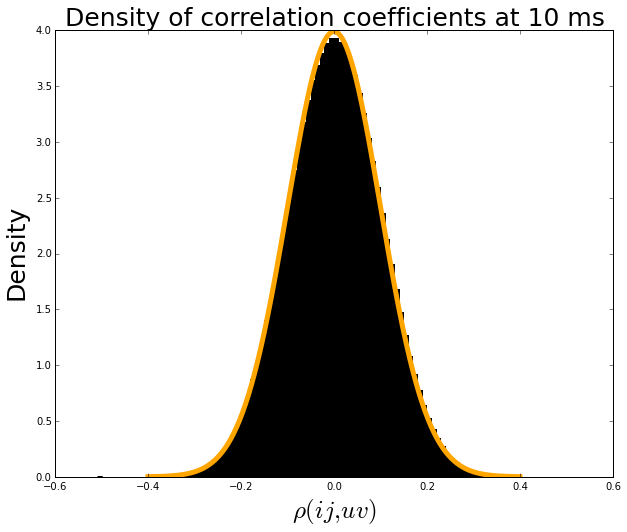

In [37]:
from scipy.stats import norm
plt.figure(dpi=600,figsize=(10,8))
hist_corr10 = plt.hist(corr10,bins=100,normed=True,color='black')
plt.xlabel(r'$\rho(ij,uv)$',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.title('Density of correlation coefficients at 10 ms',fontsize=25)
plt.plot(tt/10,norm.pdf(tt/10,0,0.1),color='orange',lw=5)

Empirical density in black, theoretical one, $\mathcal{N}(0,0.01)$, in
orange.

The empirical variance (x 100 and rounded to the third decimal) of the
samples of correlation coefficients (1 sample per exposure duration)
are:

In [38]:
var_of_corr_list = [np.var(correlations(calibration[n+'/stack'])) for n in list(calibration)]
[[n for n in list(calibration)], [int(100000*v)/1000 for v in var_of_corr_list]]

[['100ms',
  '10ms',
  '20ms',
  '30ms',
  '40ms',
  '50ms',
  '60ms',
  '70ms',
  '80ms',
  '90ms'],
 [1.009, 1.01, 1.009, 1.01, 1.01, 1.01, 1.009, 1.01, 1.009, 1.009]]

We wrote previously :
-   If our model is correct we should have for each pixel $i,j$, for a
    given exposure time, a mean value:
    $$\bar{y}_{i,j} = \frac{1}{100} \sum_{k=1}^{100} y_{i,j,k} \approx G \, p_{i,j} \tau $$
-   and a variance:
    $$S_{i,j}^2 = \frac{1}{99} \sum_{k=1}^{100} (y_{i,j,k}-\bar{y}_{i,j})^2 \approx G^2 \, (p_{i,j} \tau+\sigma_{R}^2) \; .$$
-   **The graph of $S_{i,j}^2$ *vs* $\bar{y}_{i,j}$ should be a straight
    line with slope $G$ ordinate at 0, $G^2 \sigma_{R}^2$.**


(0, 1000)

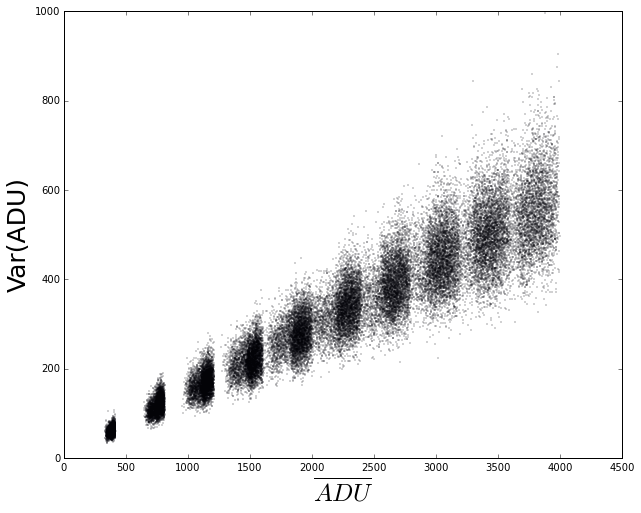

In [39]:
plt.figure(dpi=600,figsize=(10,8))
for x,y in zip([np.mean(calibration[n+'/stack'],2) for n in list(calibration)],
               [np.var(calibration[n+'/stack'],2) for n in list(calibration)]):
    plt.scatter(x.flatten(),y.flatten(),0.05)

plt.xlabel(r'$\overline{ADU}$',fontsize=25)
plt.ylabel("Var(ADU)",fontsize=25)
plt.xlim([0,4500])
plt.ylim([0,1000])

We do see the expected linear relation:
$\mathrm{Var}[ADU] = G^2 \sigma_{R}^2 + G \mathrm{E}[ADU]$.

### Linear fit

The [heteroscedasticity](http://en.wikipedia.org/wiki/Heteroscedasticity)
(inhomogeneous variance) visible on the graph is also expected since the
variance of a variance for an IID sample of size $K$ from a normal
distribution with mean $\mu$ and variance $\sigma^2$ is:
$$\mathrm{Var}[S^2] = \frac{2\sigma^4}{(K-1)} \; .$$

-   This means than when we do our linear fit,
    $$y_k = a + b x_k + \sigma_k \epsilon_k \, ,$$ we should use
    weights.
-   Here $$x_k = \overline{ADU}_k \quad y_k = \mathrm{Var}[ADU]_k \, ,$$
    $$b = G \quad a = G^2 \sigma_R^2 \, .$$
-   It's easy to show that the least square estimates are:
    $$\hat{a} = \frac{1}{Z} \sum_k \frac{y_k-\hat{b} x_k}{\sigma_k^2} \quad \text{where} \quad Z = \sum_k \frac{1}{\sigma_k^2}$$
    and
    $$\hat{b} = \left(\sum_k \frac{x_k}{\sigma_k^2} \left(y_k - \frac{1}{Z}\sum_j \frac{y_j}{\sigma_j^2}\right)\right) / \left(\sum_k \frac{x_k}{\sigma_k^2}\left(x_k - \frac{1}{Z}\sum_j \frac{x_j}{\sigma_j^2}\right)\right) \, .$$
-   We don't know $\sigma_k$ but we have an estimation:
    $\hat{\sigma}_k^2 = \mathrm{Var}[S_k^2]$ we can "plug-in" this value
    to get our weights.


In [40]:
X_k = np.concatenate([x.flatten() for x in [np.mean(calibration[n+'/stack'],2) for n in list(calibration)]])
y_k = np.concatenate([x.flatten() for x in [np.var(calibration[n+'/stack'],2) for n in list(calibration)]])
sigma2_k = 2*y_k**2/(calibration['10ms/stack'].shape[2]-1)
Z = sum(1/sigma2_k)
num1 = sum(X_k/sigma2_k*(y_k-sum(y_k/sigma2_k)/Z))
denom1 = sum(X_k/sigma2_k*(X_k-sum(X_k/sigma2_k)/Z))
b_hat0 = num1/denom1
a_hat0 = sum((y_k-b_hat0*X_k)/sigma2_k)/Z

(0, 1000)

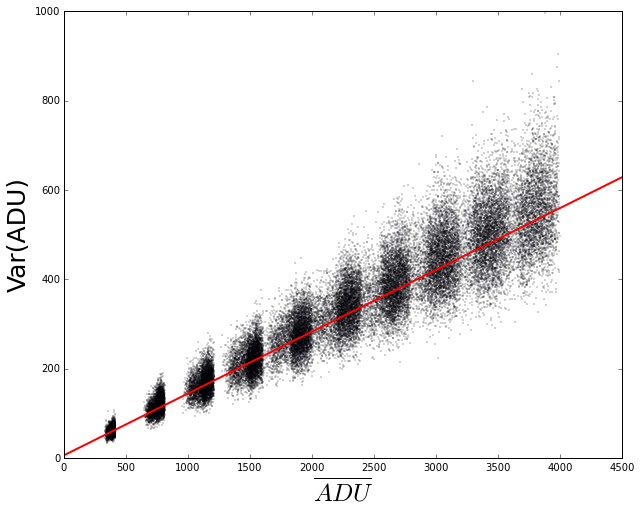

In [41]:
plt.figure(dpi=600,figsize=(10,8))
for x,y in zip([np.mean(calibration[n+'/stack'],2) for n in list(calibration)],
               [np.var(calibration[n+'/stack'],2) for n in list(calibration)]):
    plt.scatter(x.flatten(),y.flatten(),0.05)

plt.xlabel(r'$\overline{ADU}$',fontsize=25)
plt.ylabel("Var(ADU)",fontsize=25)
aa = np.linspace(0,4500)
plt.plot(np.linspace(0,4500,101),a_hat0+b_hat0*np.linspace(0,4500,101),color='red',lw=2)
plt.xlim([0,4500])
plt.ylim([0,1000])

In [42]:
G_hat0 = b_hat0
S2_hat0 = a_hat0/b_hat0**2 
(G_hat0, S2_hat0)

(0.1384399188990568, 289.85755480280824)

We have here $\hat{G} = 0.14$ and $\hat{\sigma}_R^2 = 290$.

### Checking the fit

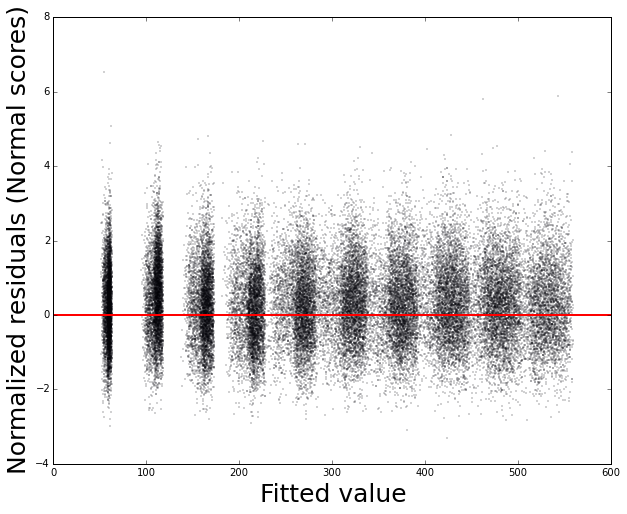

In [43]:
plt.figure(dpi=600,figsize=(10,8))
for x,y in zip([np.mean(calibration[n+'/stack'],2) for n in list(calibration)],
               [np.var(calibration[n+'/stack'],2) for n in list(calibration)]):
    plt.scatter(a_hat0+b_hat0*x.flatten(),(y.flatten()-a_hat0-b_hat0*x.flatten())*np.sqrt(99/2)/(a_hat0+b_hat0*x.flatten()),0.05)

plt.xlabel('Fitted value',fontsize=25)
plt.ylabel("Normalized residuals (Normal scores)",fontsize=25)
plt.axhline(0,color='red',lw=2)

Some remarks
----------------

-   When we use a linear regression, we are (implicitly) assuming that
    the "independent" variable, here $\overline{ADU}_k$, is *exactly*
    known.
-   This was clearly not the case here since $\overline{ADU}_k$ was
    measured (with an error).
-   We could and will therefore refine our fit.


Error propagation and variance stabilization
=========================

Error propagation 
--------------------------

-   Let us consider two random variables: $Y$ and $Z$ such that:
-   $Y \approx \mathcal{N}(\mu_Y,\sigma^2_Y)$ or
    $Y \approx \mu_Y + \sigma_Y \, \epsilon$
-   $Z = f(Y)$, with $f$ continuous and differentiable.
-   Using a first order Taylor expansion we then
    have:$$ \begin{array}{lcl} Z & \approx & f(\mu_Y + \sigma_Y \, \epsilon) \\ & \approx & f(\mu_Y) + \sigma_Y \, \epsilon \, \frac{d f}{d Y}(\mu_Y) \end{array}$$
-   $\mathrm{E}Z \approx f(\mu_Y) = f(\mathrm{E}Y)$
-   $\mathrm{Var}Z \equiv \mathrm{E}[(Z-\mathrm{E}Z)^2] \approx \sigma^2_Y \, \frac{d f}{d Y}^2(\mu_Y)$
-   $Z \approx f(\mu_Y) + \sigma_Y\left| \frac{d f}{d Y}(\mu_Y)\right| \, \epsilon$

Variance stabilization
------------------------------

-   For our CCD model we have (for a given pixel):
    $$Y \sim G \, \lambda + \sqrt{G^2 \, (\lambda+\sigma_{R}^2)} \, \epsilon = \mu_Y + \sqrt{G \, \mu_Y + G^2 \, \sigma_{R}^2} \, \epsilon \, .$$
-   Then if $Z = f(Y)$ we get:
    $$Z \approx f(\mu_Y) + \mid f'(\mu_Y) \mid G \sqrt{\mu_Y / G+\sigma_{R}^2} \, \epsilon$$
-   What happens then if we take: \$f(x) = 2  
    \sqrt{x/G + \sigma_{R}^2} \$?
-   We have: $$f'(x) = \frac{1}{G \sqrt{ x / G + \sigma_{R}^2}}$$
-   Leading to:
    $$Z \approx 2 \, \sqrt{\mu_Y / G + \sigma_{R}^2} + \epsilon$$


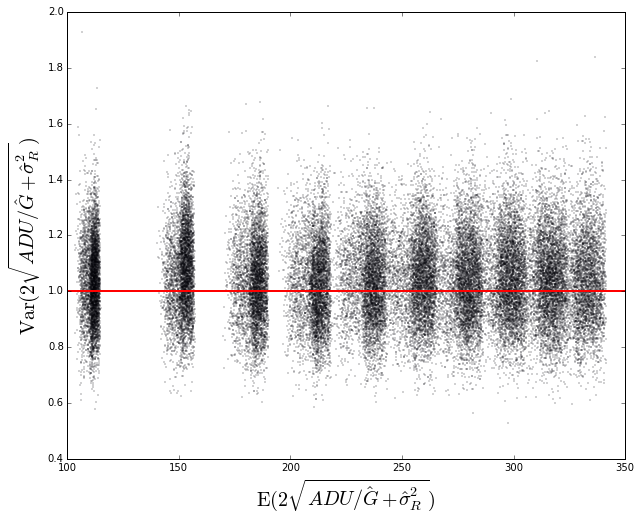

In [44]:
plt.figure(dpi=600,figsize=(10,8))
for x,y in zip([np.mean(2*np.sqrt(calibration[n+'/stack']/G_hat0+S2_hat0),2) for n in list(calibration)],
               [np.var(2*np.sqrt(calibration[n+'/stack']/G_hat0+S2_hat0),2) for n in list(calibration)]):
    plt.scatter(x.flatten(),y.flatten(),0.05)

plt.xlabel(r'$\mathrm{E}(2 \sqrt{ADU/\hat{G}+\hat{\sigma}_R^2})$',fontsize=20)
plt.ylabel(r'$\mathrm{Var}(2 \sqrt{ADU/\hat{G}+\hat{\sigma}_R^2})$',fontsize=20)
plt.xlim([100,350])
plt.axhline(1,color='red',lw=2)

Application 
=======

Back to where we started
---------------------------------

![](figs/POMC-raw-data.png)

ADU counts (raw data) from Fura-2 excited at 340 nm. Each square
corresponds to a pixel. 25.05 s of data are shown. Same scale on each
sub-plot. Data recorded by Andreas Pippow (Kloppenburg Lab. Cologne University).

Quick ROI detection: Motivation
------------------------------------------

-   After variance stabilization:
    $Z_{i,j,k} = 2 \, \sqrt{ADU_{i,j,k} / G + \sigma_{R}^2}$, the
    variance at each pixel $(i,j)$ at each time, $k$, should be 1.
-   If a pixel contains no dynamical signal---that is nothing more than
    a constant background signal---the following statistics:
    $$RSS_{i,j} \equiv \sum_{k=1}^{K} (Z_{i,j,k} - \overline{Z}_{i,j})^2 \quad \mathrm{with} \quad \overline{Z}_{i,j} \equiv \frac{1}{K} \sum_{k=1}^{K} Z_{i,j,k}$$
    should follow a $\chi^2$ distribution with $K-1$ degrees of freedom.
-   We could therefore compute the values of the complementary
    cumulative distribution function of the theoretical $\chi_{K-1}^2$
    distribution:$$1 - F_{\chi_{K-1}^2}(RSS_{i,j})$$ and look for very
    small values---that is very small probabilities---(using a log scale
    helps here).


In [46]:
stack_pomc_stab = 2*np.sqrt(np.copy(stack_pomc)/G_hat0+S2_hat0)
stack_pomc_stab_rss = np.sum((stack_pomc_stab-stack_pomc_stab.mean(2).reshape((60,80,1)))**2,2)

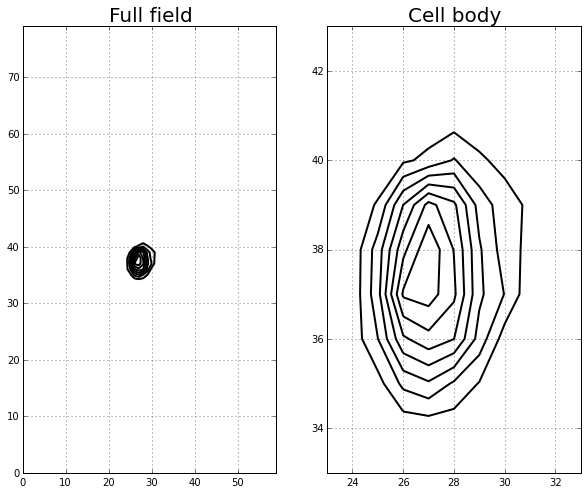

In [47]:
from scipy.stats import chi2
plt.figure(dpi=600,figsize=(10,8))
plt.subplot(121)
plt.contour(range(60),range(80),
            np.transpose(np.log(chi2.sf(stack_pomc_stab_rss,df=stack_pomc_stab.shape[2]-1))),
            linewidths=2,linestyles='solid',colors='black')
plt.grid()
plt.title('Full field', fontsize=20)
plt.subplot(122)
plt.contour(range(60),range(80),
            np.transpose(np.log(chi2.sf(stack_pomc_stab_rss,df=stack_pomc_stab.shape[2]-1))),
            linewidths=2,linestyles='solid',colors='black')
plt.xlim([23,33])
plt.ylim([33,43])
plt.title('Cell body', fontsize=20)
plt.grid()

Contour plots of $\log\left(1 - F_{\chi_{K-1}^2}(RSS_{i,j})\right)$

Pointwise time course estimation
---------------------------------------------

-   We are going to be (very) conservative and keep as our ROI the
    pixels having an
    $\log\left(1 - F_{\chi_{K-1}^2}(RSS)\right) \le -300$.
-   We are then left with 12 pixels.
-   We are going to model the fluorescence intensity of each of these
    pixels by: $$S_{i,j}(t) = \phi_{i,j} \, f(t) + b \; ,$$ where $f(t)$
    is a signal time course to all pixels of the ROI, $\phi_{i,j}$ is a
    pixel specific parameter and $b$ is a background fluorescence
    assumed identical for each pixel.
-   The time $t$ is in fact a discrete variable, $t = \delta \, k$
    ($\delta$ = 150 ms) and we are seeking a pointwise estimation:
    $\{f_1,f_2,\ldots,f_K\}$ ($K$ = 168) where $f_k = f(\delta \, k)$.
-   We end up with 12 ($\phi_{i,j}$) + 168 ($f_k$) + 1 ($b$) = 181
    parameters for 12 x 168 = 2016 measurements.
-   We need to add a constraint since with our model specification:
    $$S_{i,j,k} = \phi_{i,j} \, f_k + b \; ,$$ we can multiply all the
    $\phi_{i,j}$ by 2 and divide all the $f_k$ by 2 and get the same
    prediction.
-   We are going to set $f_k=1$ for the first 5 time points (the
    stimulation comes at the 11th) and our pointwise estimation relates
    to what is usually done with this type of data, $\Delta S(t) / S_0$
    (where $S_0$ is a baseline average) through:
    $$\Delta S(t) / S_0 = \frac{S(t) - S_0}{S_0} = f(t) - 1 + \mathrm{noise}\, .$$
-   **Notice that no independent background measurement is used**.
-   With variance stabilization we end up minimizing:
    $$RSS\left(b,(\phi_{i,j}),(f_k)_{k=5,\ldots,168}\right) = \sum_{(i,j) \in \mathrm{ROI}} \sum_{k=1}^{168} \left(Z_{ijk}-F_{ijk}\right)^2 \, ,$$
    where $$Z_{ijk} = 2*\sqrt{ADU_{ijk}/\hat{G}+\hat{\sigma}_R^2}$$ and
    $$F_{ijk} = 2*\sqrt{\phi_{i,j} \, f_k + b + \hat{\sigma}_R^2}\, .$$
-   If our model is correct we should have:
    $$RSS\left(\hat{b},(\hat{\phi}_{i,j}),(\hat{f}_k)_{k=5,\ldots,168}\right) \sim \chi^2_{12 \times 168 - 176}\, .$$
-   The method also generates confidence intervals for the estimated
    parameters.


Pointwise time course estimation: Technical details
----------------------------------------------------------------

-   To solve this 176 dimensional optimization problem in a reasonable
    time (\< 10 s) in `Python` we use Newton's method with conjugate
    gradients for the inversion of the Hessian matrix.
-   That means we have to define a function returning the
    gradient---vector of first derivatives---and the Hessian---matrix of
    second derivatives---of the `RSS` we just defined (**that's a
    painful work**).
-   To improve numerical behavior, since all parameters are positive, we
    work with the log of the parameters.

Doing the fit
------------------------

### Symbolic derivation setting

We want now to define three functions :

1.  One that returns the residuals sum of square given the model's
    parameters (and the data):
    \$RSS\left(b,(*ϕ*~i,j~),(f~k~)~k=5,…,168~\right) =
    ∑~(i,j)\\  ∈ *R**O**I*~ ∑~k=1~^168^ \left(Z~ijk~-F~ijk~\right)^2^  
    ,\$ where $Z_{ijk} = 2*\sqrt{ADU_{ijk}/\hat{G}+\hat{\sigma}_R^2}$
    and $F_{ijk} = 2*\sqrt{\phi_{i,j} \, f_k + b + \hat{\sigma}_R^2}$.
2.  One that returns the gradient vector of this RSS.
3.  One that returns the Hessian matrix.

As explained above, since all the model parameters are positive we are
going to define these three functions as functions of the log of the
parameters. We are going to use the `SymPy` module to get the analytical
expressions we need to define our functions.

We start by defining a symbolic "unitary" rss corresponding to one term
$(i,j,k)$ in the sum:
$$\left(2*\sqrt{ADU_{ijk}/\hat{G}+\hat{\sigma}_R^2} - 2*\sqrt{\exp \log \phi_{i,j} \, \exp \log f_k + \exp \log b + \hat{\sigma}_R^2}\right)^2 \, .$$

In the code that follows:

-   `y_k` stands for $2*\sqrt{ADU_{ijk}/\hat{G}+\hat{\sigma}_R^2}$.
-   `logphi_i` stands for $\log \phi_{i,j}$.
-   `logf_k` stands for $\log f_k$.
-   `logb_sy` stands for $\log b$.
-   `S2_L` stands for $\hat{\sigma}_R^2$.


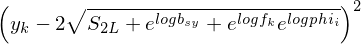

In [68]:
y_k,logphi_i,logf_k,logb_sy,S2_L = sy.symbols('y_k,logphi_i,logf_k,logb_sy,S2_L',real=True)
rss_u = (y_k - 2*sy.sqrt(sy.exp(logphi_i)*sy.exp(logf_k)+sy.exp(logb_sy)+S2_L))**2
rss_u

### Symbolic gradient

We get the first derivative with respect to `logb_sy` with:

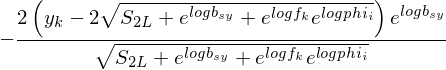

In [69]:
sy.diff(rss_u,logb_sy)

In [70]:
print(sy.diff(rss_u,logb_sy))

-2*(y_k - 2*sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)))*exp(logb_sy)/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over all the pixels $(i,j)$ at all
times $k$. We get the first derivative with respect to `logphi_i` with:

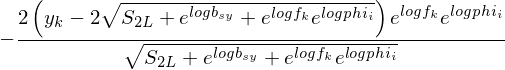

In [71]:
sy.diff(rss_u,logphi_i)

In [72]:
print(sy.diff(rss_u,logphi_i))

-2*(y_k - 2*sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)))*exp(logf_k)*exp(logphi_i)/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **a single pixel** $(i,j)$ at all
times $k$. We get the first derivative with respect to `logf_k` with:

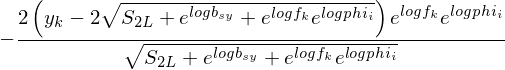

In [73]:
sy.diff(rss_u,logf_k)

In [74]:
print(sy.diff(rss_u,logf_k))

-2*(y_k - 2*sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)))*exp(logf_k)*exp(logphi_i)/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **all the pixels** $(i,j)$ at **a
single time** $k$.

### Symbolic Hessian

We get the second derivative with respect to `logb_sy` with:


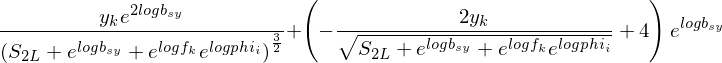

In [75]:
sy.collect(sy.simplify(sy.diff(rss_u,logb_sy,logb_sy)),sy.exp(logb_sy))

In [76]:
print(sy.collect(sy.simplify(sy.diff(rss_u,logb_sy,logb_sy)),sy.exp(logb_sy)))

y_k*exp(2*logb_sy)/(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))**(3/2) + (-2*y_k/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)) + 4)*exp(logb_sy)


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **all the pixels** $(i,j)$ at
**all times** $k$. We get the second derivative with respect to
`logb_sy` and `logphi_i` with:

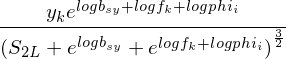

In [77]:
sy.collect(sy.simplify(sy.diff(rss_u,logb_sy,logphi_i)),sy.exp(logf_k)*sy.exp(logphi_i))

In [78]:
print(sy.collect(sy.simplify(sy.diff(rss_u,logb_sy,logphi_i)),sy.exp(logf_k)*sy.exp(logphi_i)))

y_k*exp(logb_sy + logf_k + logphi_i)/(S2_L + exp(logb_sy) + exp(logf_k + logphi_i))**(3/2)


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **a single pixel** $(i,j)$ at
**all times** $k$. We get the second derivative with respect to
`logb_sy` and `logf_k` with:

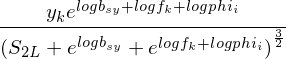

In [79]:
sy.collect(sy.simplify(sy.diff(rss_u,logb_sy,logf_k)),sy.exp(logf_k)*sy.exp(logphi_i))

In [80]:
print(sy.collect(sy.simplify(sy.diff(rss_u,logb_sy,logf_k)),sy.exp(logf_k)*sy.exp(logphi_i)))

y_k*exp(logb_sy + logf_k + logphi_i)/(S2_L + exp(logb_sy) + exp(logf_k + logphi_i))**(3/2)


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **all the pixels** $(i,j)$ at
**at a single time** $k$. We get the second derivative with respect to
`logphi_i` with:

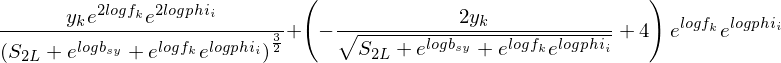

In [81]:
sy.collect(sy.simplify(sy.diff(rss_u,logphi_i,logphi_i)),sy.exp(logf_k)*sy.exp(logphi_i))

In [82]:
print(sy.collect(sy.simplify(sy.diff(rss_u,logphi_i,logphi_i)),sy.exp(logf_k)*sy.exp(logphi_i)))

y_k*exp(2*logf_k)*exp(2*logphi_i)/(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))**(3/2) + (-2*y_k/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)) + 4)*exp(logf_k)*exp(logphi_i)


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **a single pixel** $(i,j)$ at
**all times** $k$. The second derivative with respect to the $\phi$ of
two different pixels is null. We get the second derivative with respect
to `logphi_i` and `logf_k` with:

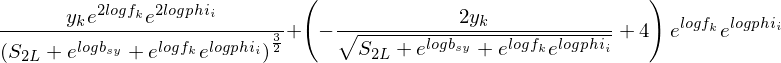

In [83]:
sy.collect(sy.simplify(sy.diff(rss_u,logphi_i,logf_k)),sy.exp(logf_k)*sy.exp(logphi_i))

In [84]:
print(sy.collect(sy.simplify(sy.diff(rss_u,logphi_i,logf_k)),sy.exp(logf_k)*sy.exp(logphi_i)))

y_k*exp(2*logf_k)*exp(2*logphi_i)/(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))**(3/2) + (-2*y_k/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)) + 4)*exp(logf_k)*exp(logphi_i)


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **a single pixel** $(i,j)$ at **a
single time** $k$. We get the second derivative with respect to `logf_k`
with:

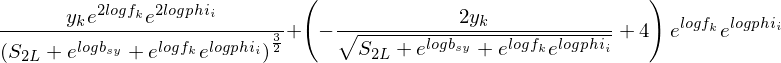

In [85]:
sy.collect(sy.simplify(sy.diff(rss_u,logf_k,logf_k)),sy.exp(logf_k)*sy.exp(logphi_i))

In [86]:
print(sy.collect(sy.simplify(sy.diff(rss_u,logf_k,logf_k)),sy.exp(logf_k)*sy.exp(logphi_i)))

y_k*exp(2*logf_k)*exp(2*logphi_i)/(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i))**(3/2) + (-2*y_k/sqrt(S2_L + exp(logb_sy) + exp(logf_k)*exp(logphi_i)) + 4)*exp(logf_k)*exp(logphi_i)


When this "unitary" expression is re-injected into the "full" $RSS$
expression, the summation is made over **all the pixels** $(i,j)$ at **a
single time** $k$. The block of the Hessian matrix generated by the
second derivatives with respect to the `logf_k` parameters is
**diagonal**.

### Extracting the data for the fit

In [48]:
from scipy.stats import chi2
threshold = -300
good_pix = np.where(np.log(chi2.sf(stack_pomc_stab_rss,df=stack_pomc_stab.shape[2]-1)) < -300)
data4fit = stack_pomc_stab[good_pix[0],good_pix[1],:]

### Functions definitions

We come now to the definition of the three functions ($RSS$, gradient
and Hessian). We start in fact with a "constructor" function, that is a
function taking the data as argument and returning a triplet of
functions:

In [49]:
def mk_rss(data=data4fit,
           S2=S2_hat0,
           base_length=5):
    npix,K = data.shape
    f = np.ones((K,))
    nabla = np.zeros((K-base_length+npix+1,))
    hessian = np.zeros((K-base_length+npix+1,K-base_length+npix+1))
    d2phi = np.zeros((npix,))
    dphidf = np.zeros((npix,K))
    d2f = np.zeros((K,))
    pred = np.zeros(data.shape)
    def rss(par):
        par = np.exp(np.copy(par))
        b = par[0]
        phi = par[1:(npix+1)]
        f[:]=1.
        f[base_length:] = par[(npix+1):]
        pred[:,:] = 2*np.sqrt(np.outer(phi,f)+b+S2)
        return np.sum((data-pred)**2)
    def grad(par):
        par = np.exp(np.copy(par))
        b = par[0]
        phi = par[1:(npix+1)]
        f[:]=1.
        f[base_length:] = par[(npix+1):]
        pred[:,:] = np.sqrt(np.outer(phi,f)+b+S2)
        nabla[0] = np.sum(-2*b*(data - 2*pred)/pred)
        nabla[1:(npix+1)] = np.sum(-2*f.reshape((1,K))*phi.reshape((npix,1))*(data - 2*pred)/pred,1)
        nabla[(npix+1):] = np.sum(-2*f.reshape((1,K))*phi.reshape((npix,1))*(data - 2*pred)/pred,0)[base_length:]
        return nabla
    def hess(par):
        par = np.exp(np.copy(par))
        b = par[0]
        phi = par[1:(npix+1)]
        f[:]=1.
        f[base_length:] = par[(npix+1):]
        pred[:,:] = np.sqrt(np.outer(phi,f)+b+S2)
        hessian[:,:] = 0.
        hessian[0,0] = np.sum(data*b**2/pred**3+(4-2*data/pred)*b)
        hessian[0,1:(npix+1)] = np.sum(data*b*f.reshape((1,K))*phi.reshape((npix,1))/pred**3,1)
        hessian[1:(npix+1),0] = np.sum(data*b*f.reshape((1,K))*phi.reshape((npix,1))/pred**3,1)
        hessian[0,(npix+1):] = np.sum(data*b*f.reshape((1,K))*phi.reshape((npix,1))/pred**3,0)[base_length:]
        hessian[(npix+1):,0] = np.sum(data*b*f.reshape((1,K))*phi.reshape((npix,1))/pred**3,0)[base_length:]
        dphidf[:,:] = data*f.reshape((1,K))**2*phi.reshape((npix,1))**2/pred**3+(4-2*data/pred)*f.reshape((1,K))*phi.reshape((npix,1))
        d2phi[:] = np.sum(dphidf,1)
        for i in range(npix):
            hessian[1+i,1+i] = d2phi[i]
            hessian[1+i,(npix+1):] = dphidf[i,base_length:]
            hessian[(npix+1):,i+1] = dphidf[i,base_length:]
        d2f[:] = np.sum(dphidf,0)
        for i in range(K-base_length):
            hessian[(npix+1+i),(npix+1+i)] = d2f[i+base_length]
        return hessian
    return (rss,grad,hess)

We then "instantiate" the three functions:

In [50]:
rss0, grad0, hess0 = mk_rss(data4fit)

### Getting the initial guesses

We use a classical $\Delta F / F_0$ to get the initial guesses. We set
the (initial guess for the) background fluorescence to an arbitrary
small but postive value:

In [51]:
baseline = stack_pomc[good_pix[0],good_pix[1],:5].mean(1)
f_0 = np.mean(stack_pomc[good_pix[0],good_pix[1],:]/baseline.reshape((12,1)),0)
b_0 = 100
phi_0 = np.mean((stack_pomc[good_pix[0],good_pix[1],:]-b_0)/f_0.reshape((1,168)),1)
par_0 = np.zeros((1+12+163,))
par_0[0] = b_0
par_0[1:13] = phi_0
par_0[13:] = f_0[5:]

### Checking the analytical expressions

The codes returning the gradient and Hessian matrix are somewhat
tedious, meaning that we could have made mistakes typing them. It's
therefore a good policy to check their results against slow but less
error prone codes doing the gradient and Hessian matrix evaluation
numerically. We define first a function returning the gradient using the
central difference:

In [52]:
def grad_num(fct=rss0,
             par=np.log(np.copy(par_0)),
             delta=1e-6):
    n_par = len(par)
    res = np.zeros((n_par,))
    for i in range(n_par):
        par[i] += delta
        res[i] += fct(par)
        par[i] -= 2*delta
        res[i] -= fct(par)
        par[i] += delta
    return res/2/delta

We define next a function returning a numerical evaluation of the
Hessian matrix:

In [53]:
def hess_num(fct=rss0,
             par=np.log(np.copy(par_0)),
             delta=1e-4):
    n_par = len(par)
    res = np.zeros((n_par,n_par))
    f0 = fct(par)
    for i in range(n_par):
        for j in range(i,n_par):
            par[i] += delta
            par[j] += delta
            f3 = fct(par)
            par[i] -= delta
            f2 = fct(par)
            par[i] += delta
            par[j] -= delta
            f1 = fct(par)
            par[i] -= delta
            res[i,j] = (f3-f2-f1+f0)/delta**2
            if j > i:
                res[j,i] = (f3-f2-f1+f0)/delta**2
    return res

We can now do the tests:

In [54]:
g0 = grad0(np.log(par_0))
g0n = grad_num(rss0,np.log(np.copy(par_0)))
h0 = hess0(np.log(par_0))
h0n = hess_num(rss0,np.log(np.copy(par_0)),delta=1e-3)
not_zero = np.abs(h0) > 0.
print('Initial RSS value: \n', rss0(np.log(par_0)), '\n')
print('Maximal relative difference (in absolute value) between analytical and numerical gradient: \n', np.max(np.abs(g0-g0n)/np.abs(g0)),'\n')
print('Maximal relative difference (in absolute value) between analytical and numerical Hessian: \n', np.max(np.abs(h0n[not_zero]-h0[not_zero])/np.abs(h0[not_zero])), '\n')

Initial RSS value: 
 17547562.449 

Maximal relative difference (in absolute value) between analytical and numerical gradient: 
 5.89580034732e-08 

Maximal relative difference (in absolute value) between analytical and numerical Hessian: 
 0.000847340050286 



### Doing the fit

In [55]:
from scipy.optimize import minimize
res = minimize(rss0,np.log(par_0),method='Newton-CG',jac=grad0,hess=hess0,options={'disp': True, 'xtol': 1e-8})

Optimization terminated successfully.
         Current function value: 1975.518323
         Iterations: 178
         Function evaluations: 347
         Gradient evaluations: 524
         Hessian evaluations: 178


We see here the clear reduction in the $RSS$, starting at 17547562 and
ending at 1975.

### Definition of a function returning the prediction

In [56]:
def mk_pred(p_vector,
            log_scale=False,
            stabilise_var=True,
            S2=S2_hat0,
            G=G_hat0,
            base_length=5):
    if log_scale:
        p_vector = np.exp(p_vector)
    phi = p_vector[1:13]
    b = p_vector[0]
    f = np.ones((168,))
    f[base_length:] = p_vector[13:]
    pred = np.outer(phi,f)+b
    if stabilise_var:
        return 2*np.sqrt(pred+S2)
    else:
        return G*pred

Pointwise time course estimation: Time course estimate
-------------------------------------------------------------------

(0, 25)

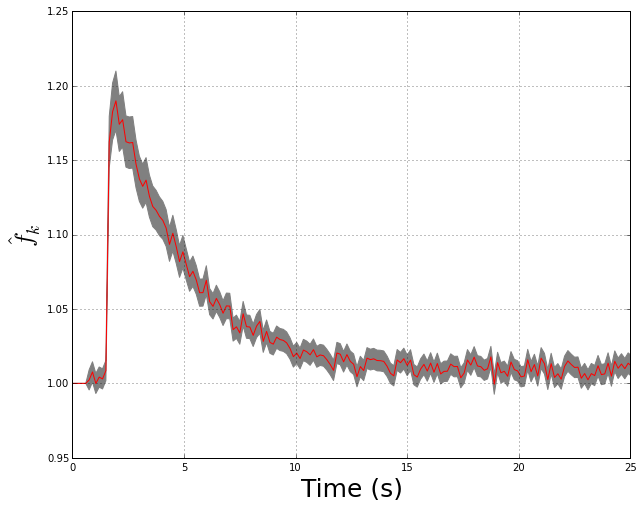

In [57]:
f_hat = np.zeros((168,))
f_hat[5:] = res.x[13:]
par_se = np.sqrt(np.diag(scipy.linalg.inv(hess0(res.x))))
f_up = np.zeros((168,))
f_up[5:] = res.x[13:] + 1.96*par_se[13:]
f_low = np.zeros((168,))
f_low[5:] = res.x[13:] - 1.96*par_se[13:]
fig, ax = plt.subplots(dpi=600,figsize=(10,8))
ax.fill_between(np.arange(168)*0.15,np.exp(f_low),np.exp(f_up),facecolor='grey',edgecolor='grey')
ax.plot(np.arange(168)*0.15,np.exp(f_hat),lw=1,color='red')
plt.grid()
plt.xlabel('Time (s)',fontsize=25)
plt.ylabel(r'$\hat{f}_k$',fontsize=25)
plt.xlim([0,25])

(138.21082385726555, 182.92690289032578)

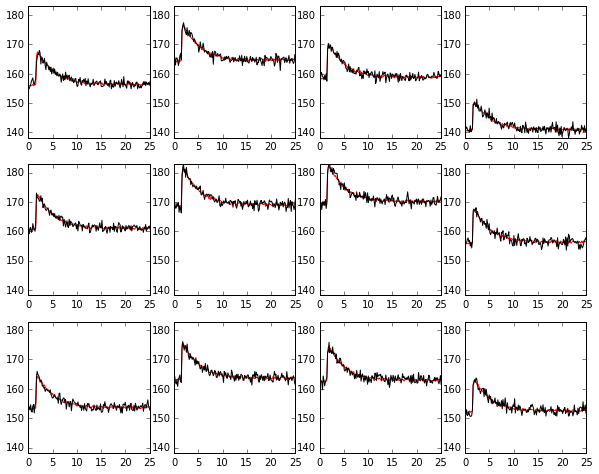

In [58]:
pred = mk_pred(res.x,True,True)
the_range = [np.min(data4fit),np.max(data4fit)]
plt.figure(dpi=600,figsize=(10,8))
plt.subplot(341)
plt.plot(np.arange(168)*0.15,pred[0,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[0,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(342)
plt.plot(np.arange(168)*0.15,pred[1,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[1,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(343)
plt.plot(np.arange(168)*0.15,pred[2,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[2,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(344)
plt.plot(np.arange(168)*0.15,pred[3,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[3,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(345)
plt.plot(np.arange(168)*0.15,pred[4,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[4,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(346)
plt.plot(np.arange(168)*0.15,pred[5,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[5,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(347)
plt.plot(np.arange(168)*0.15,pred[6,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[6,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(348)
plt.plot(np.arange(168)*0.15,pred[7,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[7,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(349)
plt.plot(np.arange(168)*0.15,pred[8,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[8,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(3,4,10)
plt.plot(np.arange(168)*0.15,pred[9,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[9,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(3,4,11)
plt.plot(np.arange(168)*0.15,pred[10,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[10,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)
plt.subplot(3,4,12)
plt.plot(np.arange(168)*0.15,pred[11,:],color='red')
plt.plot(np.arange(168)*0.15,data4fit[11,:],color='black')
plt.xlim([0,25])
plt.ylim(the_range)

Data and fit after variance stabilization. The `RSS` is 1976 giving a
probability of 0.986 (a bit large).

Thanks
---------------

This work was done in collaboration with:
-   Sebastien Joucla
-   Romain Franconville
-   Andeas Pippow
-   Peter Kloppenburg

Thank you for your attention!


In [59]:
calibration.close()